#### 독립동일분포
 - 확률변수가 서로 독립이라는 것은 확률변수가 다른 확률변수에 영향을 끼치지 않는다는 의미이다.
 - 통계분석에서 취급하는 데이터 중 상당수가 독립이면서 다차원인 확률변수의 실현값으로 간주될 수 있다.
 - 서로 독립이고 각각 동일한 확률분포를 따르는 다차원 확률변수를 독립동일분포라 한다. 
 
#### 독립성
 - 2개 이상의 확률변수가 서로 영향을 끼치지 않으며 관계가 없음을 나타내는 개념
 - 2차원 확률변수 (X,Y)의 경우 다음과 같은 관계가 성립할 때 X,Y는 독립이라고 함
$f_{X,Y}(x,y) = f_X(x)f_Y(y)$
- 확률변수가 독립일 때 결합확률은 주변확률의 곱으로 작성할 수 있다.
- 일반화 : $f_{X_1,X_2,...,X_n}(x_1,x_2,...,x_n) = f_{X_1}(x_1)f_{X_2}(x_2)...f_{X_n}(x_n)$

※ 함수 f가 이산형이면 확률함수, 연속형이면 밀도함수를 나타냄

#### 독립성과 무상관성
 - 공분산이나 상관계수가 0일 때 무상관이라 하고 두 확률변수 사이에는 상관성, 즉 선형관계가 없음을 나타냄
 - 독립성도 무상관성도 두 확률변수가 서로 관계가 없다는 것을 나타내는 성질이다.
   * 무상관성보다 독립성이 더 강한 개념
   * 2개의 확률변수 X와 Y가 독립일 때 X와 Y는 무상관이 되지만 X와 Y가 무상관일 때 X와 Y가 반드시 독립인 것은 아님 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
linestyles = ['-','--',':','-.']

def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i,y_j)*f_XY(x_i,y_j)
                  for x_i in x_set for y_j in y_set])

def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x,y:x)
    mean_Y = E(XY, lambda x,y:y)
    return np.sum([(x_i-mean_X)*(y_j-mean_Y)*f_XY(x_i,y_j) 
                   for x_i in x_set for y_j in y_set])

def f_X(x):
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [3]:
# 불공정한 주사위(교재 p 130 참조)

x_set = np.arange(1,7)
y_set = np.arange(1,7)

def f_XY(x,y):
    if x in x_set and y in y_set:
        return x*y/441
    else:
        return 0
XY = [x_set,y_set,f_XY]

In [4]:
# 2차원 확률변수 X와 Y는 독립
# 공분산이 0이므로 무상관인것을 알 수 있음.
Cov(XY)

-8.326672684688674e-17

In [5]:
# 무상관인 2개의 확률변수 생각해보자
x_set = np.array([0,1])
y_set = np.array([-1,0,1])

def f_XY(x,y):
    if (x,y) in [(0,0),(1,1),(1,-1)]:
        return 1 / 3
    else:
        return 0
    
XY = [x_set,y_set,f_XY]

In [6]:
# 공분산은 0 이므로 확률변수 X,Y는 무상관
Cov(XY)

0.0

In [7]:
# 독립성의 정의는 𝑓𝑋,𝑌(𝑥,𝑦)=𝑓𝑋(𝑥)𝑓𝑌(𝑦)가 성립할 때 인데, 이 경우 성립여부 확인
# 무상관이어도 독립성이 성립하지 않는 경우가 있다는 것을 확인.
f_XY(0,0), f_X(0) * f_Y(0)

(0.3333333333333333, 0.1111111111111111)

## 합의 분포
 - 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n의 합 \sum_{i=1}^n X_i = X_1,+ X_2 + ... + X_n$이 따르는 확률분포를 의미
 - 합의 분포를 이해하면 확률변수의 합을 나눈 표본평균의 분포도 쉽게 이해할 수 있음.

In [8]:
# 정규분포의 합의 분포
# 서로 독립인 X ~ N(1,2), Y ~ N(2,3)이 있을 때 확률 변수 X+Y의 분포는 N(3,5)를 따름
rv1 = stats.norm(1,np.sqrt(2))
rv2 = stats.norm(2,np.sqrt(3))

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample
print('평균:',np.mean(X_sample),np.mean(Y_sample))
print('분산:',np.var(X_sample),np.var(Y_sample))
print('합의 평균,분산:',np.mean(sum_sample), np.var(sum_sample))

평균: 0.9998496131483375 1.9989585454539949
분산: 2.003498702744918 2.9990761313185375
합의 평균,분산: 2.9988081586023316 5.001196185756979


 - 재생성: 동일한 분포를 따르느 2개의 독립인 확률변수에 대해서 그 합도 동일한 확률분포가 되는 성질

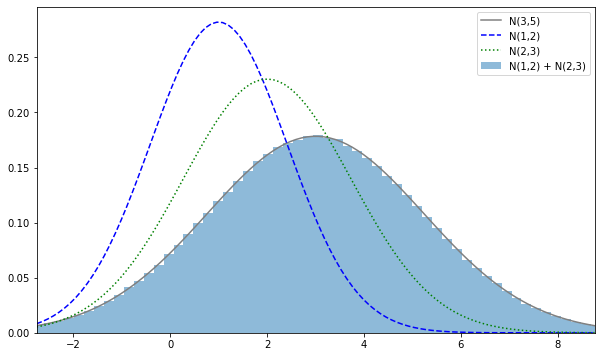

In [9]:
plt.figure(figsize=(10,6))
rv = stats.norm(3,np.sqrt(5))
xs = np.linspace(rv.isf(0.995),rv.isf(0.005),100)    #isf : 0.095의 확률

plt.hist(sum_sample, bins=100, density=True,
        alpha = 0.5, label='N(1,2) + N(2,3)')
plt.plot(xs, rv.pdf(xs), label='N(3,5)',color='gray')
plt.plot(xs, rv1.pdf(xs), label='N(1,2)',ls='--',color='blue')
plt.plot(xs, rv2.pdf(xs), label='N(2,3)',ls=':', color='green')

plt.legend()
plt.xlim(rv.isf(0.995),rv.isf(0.005))
plt.show()


# 포아송 분포의 합의 분포
 - 서로 독립인 X ~ Poi(3)과 Y ~ Poi(4)가 있을 때 확률변수 X + Y도 포아송 분포를 따르고 X + Y ~ Poi(7)이 된다.
 - n개의 포아송 분포의 합이 되더라도 재생성에 의하여 포아송 분포를 따른다.

In [10]:
rv1 = stats.poisson(3)
rv2 = stats.poisson(4)

sample_size = int(1e6)
X_sample = rv1.rvs(sample_size)
Y_sample = rv2.rvs(sample_size)
sum_sample = X_sample + Y_sample

print('평균:',np.mean(X_sample),np.mean(Y_sample),'\n')
print('분산:',np.var(X_sample),np.var(Y_sample),'\n')
print('합의 평균,분산:',np.mean(sum_sample), np.var(sum_sample))


평균: 2.998886 4.001203 

분산: 2.998494759004 3.999373552791001 

합의 평균,분산: 7.000089 7.007574992079003


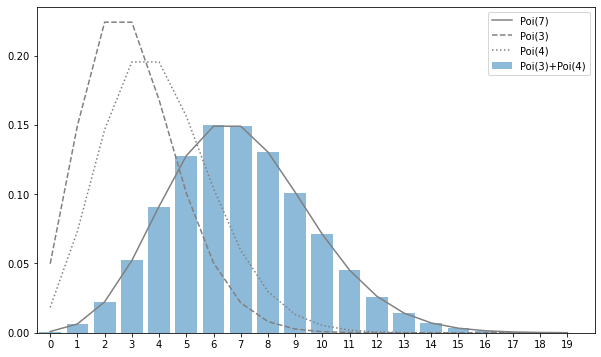

In [11]:
# 서로 독립인 n개의 확률변수가 포아송 분포에 대하여 그 합도 재생성에 의해 포아송 분포의 형태를 유지한다.
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
rv = stats.poisson(7)
xs = np.arange(20)
hist,_ = np.histogram(sum_sample,bins=20,range=(0,20),density=True)
plt.bar(xs,hist,alpha=0.5, label='Poi(3)+Poi(4)')
plt.plot(xs,rv.pmf(xs),label='Poi(7)',color='gray')
plt.plot(xs,rv1.pmf(xs),label='Poi(3)', ls='--',color='gray')
plt.plot(xs,rv2.pmf(xs),label='Poi(4)', ls=':', color='gray')

plt.legend()
plt.xlim(-0.5,20)
plt.xticks(np.arange(20))
plt.show()

 베르누의 분포의 합의 분포
  - 베르누이 분포에는 재생성이 없다.
  - 베르누이 분포의 합은 이항분포가 되는 성질이 있다. 

In [12]:
# 성공 확률이 0.3인 베르누이 분포를 따르는 확률변수 10개에 대하여 백만번 표본을 추출하여 표본평균과 표본분산을 산출
# 표본 데이터가 1개이면 베르누이분포가 되고 표본데이터가 여럿이면 이항분포가 된다.
np.random.seed(0) 
p = 0.3
rv = stats.bernoulli(p)

sample_size = int(1e6)
X_sample = rv.rvs((10,sample_size))
X_sample.shape
print('표본 추출:',X_sample.shape, '\n', '첫번째 열:',X_sample[:,0],'\n')
sum_sample = np.sum(X_sample, axis=0)
print('성공 횟수:',sum_sample,'\n')
print('성공 횟수의 평균, 분산:', np.mean(sum_sample),np.var(sum_sample,ddof=1))

표본 추출: (10, 1000000) 
 첫번째 열: [0 0 1 0 0 1 0 1 0 1] 

성공 횟수: [4 5 4 ... 5 5 1] 

성공 횟수의 평균, 분산: 3.001153 2.1007397713307716


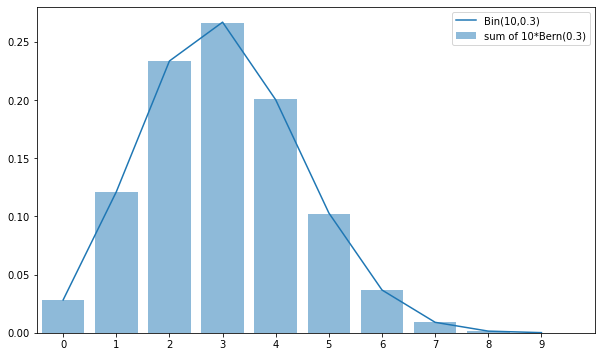

In [13]:
# normed=True를 넣어주어 정규화를 하면 전체 데이터 개수 중에 해당 구간의 값 개수가 차지하는 비율로 변환
fig = plt.figure(figsize=(10,6))
rv = stats.binom(10,p)
xs = np.arange(10)
hist,_ = np.histogram(sum_sample,bins=10,range=(0,10), normed=True)
plt.bar(xs,hist,alpha=0.5,label='sum of 10*Bern(0.3)')
plt.plot(xs,rv.pmf(xs),label='Bin(10,0.3)')
plt.legend()
plt.xlim(-0.5,10)
plt.xticks(np.arange(10))
plt.show()

표본평균의 분포
  - 표본평균의 분포란 서로 독립이고 동일한 확률분포를 따르는 확률변수 $X_1,X_2,...,X_n$의 표본평균을 따르는 분포
  - 이 분포는 중심극한정리나 대수의 법칙(모평균) 등 추측통계에서 중요한 성질을 담고 있기 때문에 유의해야 함 <br>
 $E(\bar{X}) = \mu$
 <br>
 $V(\bar{X}) = {\sigma}^2/n$

In [14]:
 # 정규분포의 표본평균 분포

mean = 1
var = 2
rv = stats.norm(mean,np.sqrt(var))

n =10
sample_size = int(1e6)
X_sample = rv.rvs((n,sample_size))
print('표본사이즈 10,표본 개수 1000000:',X_sample.shape,'\n')
sample_mean = np.mean(X_sample,axis=0)
print('표본평균 백만개:',sample_mean,len(sample_mean),'\n')
print('표본평균 백만개의 평균, 분산:',np.mean(sample_mean),np.var(sample_mean))

표본사이즈 10,표본 개수 1000000: (10, 1000000) 

표본평균 백만개: [1.26301629 0.73094529 1.48186978 ... 1.78129977 1.12365901 0.00466411] 1000000 

표본평균 백만개의 평균, 분산: 1.0003269102347059 0.19984666025029627


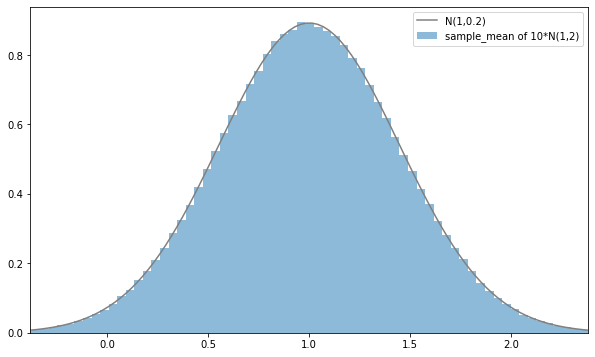

In [15]:
fig = plt.figure(figsize=(10,6))
rv_true = stats.norm(mean,np.sqrt(var/n))
xs = np.linspace(rv_true.isf(0.999),rv_true.isf(0.001),100)
plt.hist(sample_mean,bins=100,density=True,alpha=0.5,label='sample_mean of 10*N(1,2)')
plt.plot(xs,rv_true.pdf(xs),label='N(1,0.2)',color='gray')

plt.legend()
plt.xlim(rv_true.isf(0.999),rv_true.isf(0.001))
plt.show()


In [16]:
# [과제] 포아송분포의 표본평균 분포는 포아송 분포를 따르지 않고 좌우 대칭인 정규분포에 근사한 형태가 되는것을 입증하세요.

In [17]:
lam =3
rv = stats.poisson(lam)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
sample_mean = np.mean(Xs_sample,axis=0)

np.mean(sample_mean),np.var(sample_mean)

(2.9991368000000014, 0.3003514948857599)

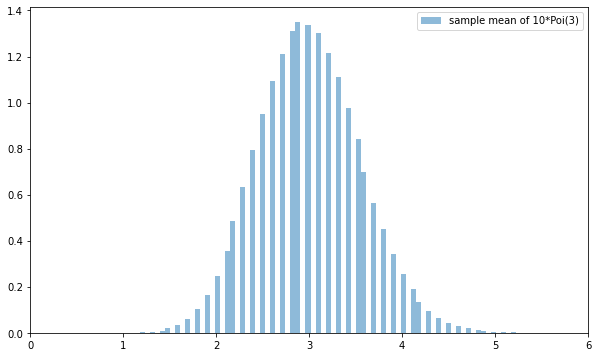

In [18]:
fig = plt.figure(figsize=(10,6))

plt.hist(sample_mean, bins=100,density=True,
        alpha=0.5, label='sample mean of 10*Poi(3)')
plt.legend()
plt.xlim(0,6)
plt.show()

In [27]:
lam = 3
rv = stats.poisson(lam)

n = 10
sample_size = int(1e6)
Xs_sample = rv.rvs((n,sample_size))
Xs_sample.shape


(10, 1000000)

In [29]:
# 기댓값과 분산이 다르다는 사실로 포아송 분포를 따르지 않는다는것을 알 수 있다.
sample_mean = np.mean(Xs_sample, axis = 0)
print( np.mean(sample_mean), np.var(sample_mean))

2.9997125999999996 0.2999138774012403


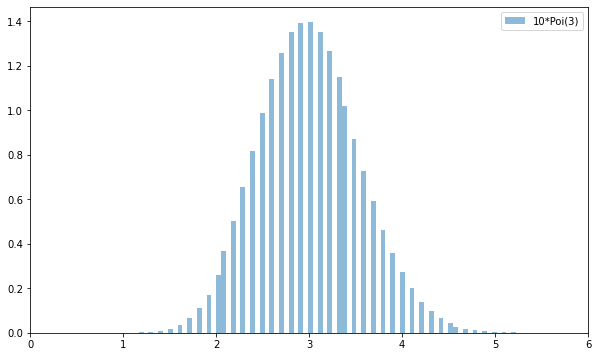

In [28]:
# 중심극한정리에 의하여 좌우 대칭인 산 모양의 정규분포에 근사한다. 
plt.figure(figsize = (10,6))
plt.hist(sample_mean, bins = 100, density = True, alpha = 0.5, label = f'10*Poi({lam})')

plt.legend()
plt.xlim(lam-lam,lam+lam)
plt.show()

#### 합의 분포와 표본평균의 분포
 - 포아송 분포나 정규분포 같은 재생성이 있는 일부 확률분포를 제외하면 합의 분포가 어떤 형태를 보이는지 일반적으로 알 수 없다.
 - 표본평균의 분포가 되면 재생성을 지닌 포아송 분포 조차도 그 형태를 유지할 수 없다.
 - 원래 분포가 무었이였든지 간에 표본 평균의 분포는 정규 분포에 근사한다.(핵심사항)

#### 중심극한정리
 - 확률변수 $X_1, X_2, ...,X_n$이 서로 독립이고 기댓값이 $\mu,분산이 {\sigma}^2$인 확률분포를 따를 때 n이 커짐에 따라 표본평균 $\bar{X}의 분포는 정규분포 N(\mu,{\sigma}^2/n)$에 가까워진다.

In [20]:
# [과제] 중심극한정리를 입증하세요. (정규,포아송이든 관계 無)
# 위의 그래프와 상동

#### 대수의 법칙
 - 확률변수 $X_1,X_2,...,X_n$이 서로 독립이고 평균이 $\mu, 분산이 \sigma^2$일것 같은 확률분포를 따를 때 n이 커짐에 따라 표본 평균은 $\mu$에 수렴한다. 

In [23]:
# [과제] sample_size의 변화에 따라 표본평균이 모평균에 수렴함을 입증하세요.

In [24]:
p = 1/6
rv = stats.bernoulli(p)

n = int(1e5)
sample = rv.rvs((n,4))
space = np.linspace(100,n,50).astype(int)
plot_list = np.array([np.mean(sample[:sp], axis=0)
                     for sp in space]).T


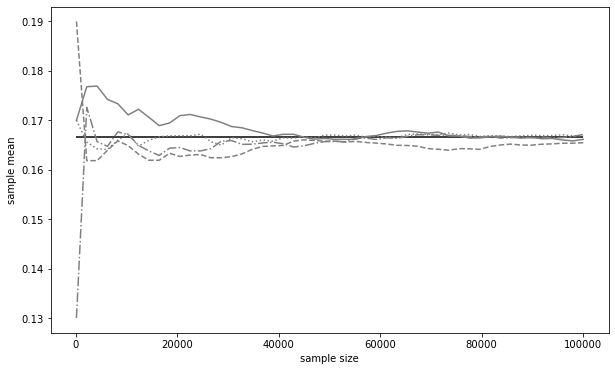

In [25]:
fig = plt.figure(figsize=(10,6))
for pl, ls in zip(plot_list, linestyles):
    plt.plot(space, pl, ls=ls, color='gray')
plt.hlines(p,-1,n,'k')
plt.xlabel('sample size')
plt.ylabel('sample mean')
plt.show()

(100000, 4) 

3.0 

(4, 50) 



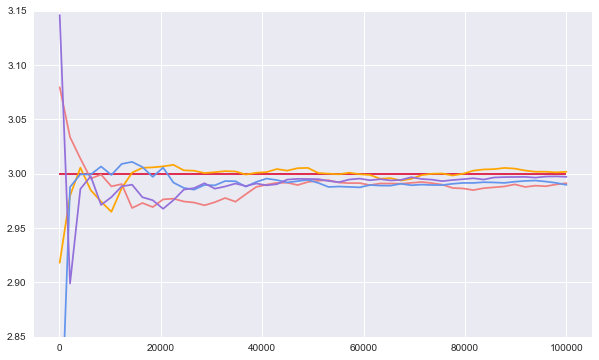

In [34]:
# 대수의 법칙에 따라 샘플사이즈의 변화에 따라 표본평균이 모평균에 수렴한다.
plt.style.use('seaborn')
rv = stats.chi2(3)
sample = rv.rvs((100000,4))
print(sample.shape,'\n')
print(rv.mean(),'\n')

color=['lightcoral','orange','cornflowerblue','mediumpurple']

plt.figure(figsize=(10,6))
size = np.linspace(100,100000,50).astype(int)
area = np.array([np.mean(sample[:i],axis=0) for i in size]).T
print(area.shape,'\n')

for i, color in zip(area, color):
    plt.plot(size, i, color=color)
plt.hlines(rv.mean(),0,100000,color='crimson')
plt.ylim(2.85,3.15)

plt.show()
